In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def Function(x):
    return x**2

def GaussianFunction(arr, x):
    x1 = arr[0]
    x2 = arr[1]
    sigma1 = arr[2]
    sigma2 = arr[3]
    
    if x < x1:
        return math.exp( - ( x - x1 )**2 / ( 2 * sigma1**2 ) )
    elif x >= x1 and x <= x2:
        return  1.0
    else:
        return math.exp( - ( x2 - x )**2 / ( 2 * sigma2**2 ) )

In [3]:
a= 0
b= 1
m = 20
n = 4

x = np.arange(a,b, (a+b)/m )
y = Function(x)


predicted_y = np.zeros(m)
x1 = x2 = (a+b)/2

A_membership = np.zeros((n,4))

#                    x1  x2 sigma1, sigma2
A_membership[0,:] = [ 0.2, 0.2, 0.2, 0.2 ]
A_membership[1,:] = [ 0.4, 0.4, 0.2, 0.2 ]
A_membership[2,:] = [ 0.6, 0.6, 0.2, 0.2 ]
A_membership[3,:] = [ 0.8, 0.8, 0.2, 0.2 ]

print (A_membership)
w = np.random.rand( n )

learning_rate = 0.0001
error = 100
while error > 0.005:
    for i in range(m):

        num = 0
        for j in range(n):
            num += GaussianFunction( A_membership[j], x[i] )* w[j]
        den = 0
        for j in range(n):
            den += GaussianFunction( A_membership[j], x[i] )

        predicted_y[i] = num / den 

    error = np.sum( (predicted_y - y)**2 ) / 2

    E = predicted_y - y
    for j in range(n):
        
        del_w = 0
        for i in range(m):
            del_w += E[i] * GaussianFunction( A_membership[j], x[i])
        
        w[j] -= learning_rate *  del_w 

[[0.2 0.2 0.2 0.2]
 [0.4 0.4 0.2 0.2]
 [0.6 0.6 0.2 0.2]
 [0.8 0.8 0.2 0.2]]


In [4]:
print (x)
print (y,"\n")
print(predicted_y)
print (error)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95]
[0.     0.0025 0.01   0.0225 0.04   0.0625 0.09   0.1225 0.16   0.2025
 0.25   0.3025 0.36   0.4225 0.49   0.5625 0.64   0.7225 0.81   0.9025] 

[0.00583398 0.01278513 0.02144355 0.03223004 0.0457025  0.0626116
 0.08395207 0.11096904 0.14505776 0.1875042  0.23907894 0.299607
 0.36771432 0.44091259 0.51602435 0.58978089 0.65936643 0.72275173
 0.77878337 0.82708753]
0.0049999957060552925


Text(0, 0.5, 'Y')

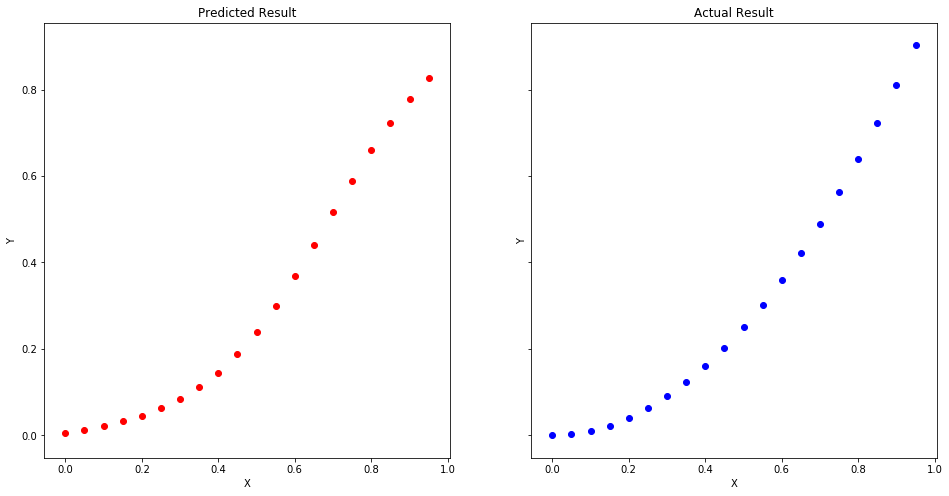

In [5]:
fig, arr = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True)

fig.set_figwidth(16)
fig.set_figheight(8)

arr[0].scatter (x, predicted_y, c='r' )
arr[0].set_title('Predicted Result')
arr[0].set_xlabel('X')
arr[0].set_ylabel('Y')

arr[1].scatter (x, y, c='b' )
arr[1].set_title('Actual Result')
arr[1].set_xlabel('X')
arr[1].set_ylabel('Y')
